In [19]:
import numpy as np
import pandas as pd
import functions
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from scipy.stats import spearmanr


In [2]:
pET = pd.read_pickle('results/pET_complete.pkl.gz')
pET.shape


(12216, 5)

In [25]:
pET['Analysed_seq'] = pET['Protein'].apply(ProteinAnalysis)
pET['Flexibility_scores'] = pET['Analysed_seq'].apply(lambda x:x.flexibility())
pET['Mean of sliding window'] = pET['Flexibility_scores'].apply(np.mean)

pET['Simple_scoring'] = pET['Protein'].apply(lambda x:functions.solubility_score(x, functions.flexibilities_vih))
pET['Mean without sliding window'] = pET['Simple_scoring'].apply(np.mean)

In [26]:
spearmanr(pET['Mean of sliding window'], pET['Mean without sliding window'])

SpearmanrResult(correlation=0.9829878088961449, pvalue=0.0)

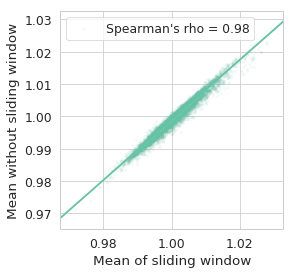

In [27]:
functions.plt.figure(figsize=(4, 4))
ax = functions.sns.regplot(pET['Mean of sliding window'], pET['Mean without sliding window'],\
                 label="Spearman's rho = 0.98", scatter_kws={'s':4,  'alpha':0.05},)
ax.legend(loc="best")
functions.plt.savefig('with_and_without_sliding_window.pdf', bbox_inches = 'tight', pad_inches = 0)